<a href="https://colab.research.google.com/github/namanraiyani/PyTorch_Practice/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [94]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Data

In [95]:
x_train = np.array([[2.5], [3.8], [5.1], [6.3], [7.0], [3.5],
                        [8.5], [5.7], [7.8], [1.9], [6.5],
                        [9.8], [4.9], [8.1], [2.2]], dtype=np.float32)

y_train = np.array([[1.4], [2.2], [2.9], [3.4], [3.7], [2.0],
                        [4.1], [3.1], [3.9], [1.1], [3.5],
                        [4.6], [2.8], [4.2], [1.3]], dtype=np.float32)

In [96]:
# Convert numpy arrays to tensors
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

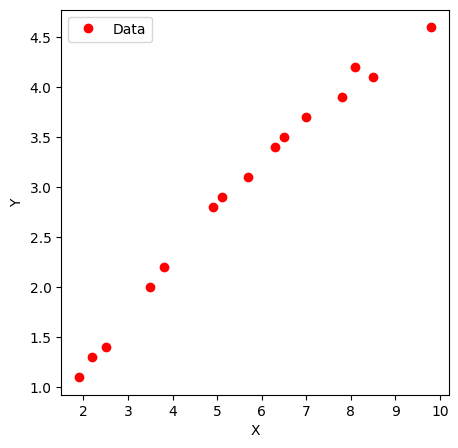

In [97]:
# Visualize data
plt.figure(figsize = (5,5))
plt.plot(x_train,y_train, 'ro', label = "Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

Define Linear Model

In [98]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_model = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    output_prediction = self.linear_model(x)
    return output_prediction

In [99]:
model = LinearRegression()
model

LinearRegression(
  (linear_model): Linear(in_features=1, out_features=1, bias=True)
)

In [100]:
model.state_dict()

OrderedDict([('linear_model.weight', tensor([[0.8297]])),
             ('linear_model.bias', tensor([-0.0402]))])

Loss Function and Optimizer

In [101]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

Training Loop

In [102]:
epochs = 1000
for epoch in range(epochs):
  model.train()
  output_prediction = model(x_train)
  loss = criterion(output_prediction, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch + 1) % 50 == 0:
    print(f'Epoch - {epoch + 1} / {epochs} \t Loss - {loss.item():.6f}')

Epoch - 50 / 1000 	 Loss - 1.695343
Epoch - 100 / 1000 	 Loss - 0.828636
Epoch - 150 / 1000 	 Loss - 0.420248
Epoch - 200 / 1000 	 Loss - 0.227786
Epoch - 250 / 1000 	 Loss - 0.137053
Epoch - 300 / 1000 	 Loss - 0.094249
Epoch - 350 / 1000 	 Loss - 0.074025
Epoch - 400 / 1000 	 Loss - 0.064440
Epoch - 450 / 1000 	 Loss - 0.059867
Epoch - 500 / 1000 	 Loss - 0.057656
Epoch - 550 / 1000 	 Loss - 0.056558
Epoch - 600 / 1000 	 Loss - 0.055984
Epoch - 650 / 1000 	 Loss - 0.055657
Epoch - 700 / 1000 	 Loss - 0.055447
Epoch - 750 / 1000 	 Loss - 0.055292
Epoch - 800 / 1000 	 Loss - 0.055163
Epoch - 850 / 1000 	 Loss - 0.055046
Epoch - 900 / 1000 	 Loss - 0.054936
Epoch - 950 / 1000 	 Loss - 0.054829
Epoch - 1000 / 1000 	 Loss - 0.054723


Test

In [103]:
model.eval()
with torch.no_grad():
  predictions = model(x_train)
predictions.data.numpy()

array([[1.2508091],
       [1.9383174],
       [2.625826 ],
       [3.2604494],
       [3.630646 ],
       [1.7796617],
       [4.423925 ],
       [2.9431374],
       [4.053728 ],
       [0.9334974],
       [3.3662198],
       [5.1114335],
       [2.5200555],
       [4.212384 ],
       [1.0921533]], dtype=float32)

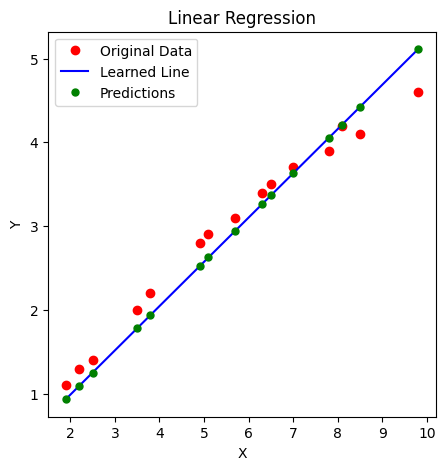

In [104]:
# Visualize Results
plt.figure(figsize = (5,5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label = "Original Data")

predicted_line_x = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
with torch.no_grad():
    predicted_line_y = model(predicted_line_x)
plt.plot(predicted_line_x.numpy(), predicted_line_y.numpy(), 'b-', label = 'Learned Line')

plt.plot(x_train.numpy(), predictions.numpy(), 'go', markersize = 5, label = 'Predictions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()